# Clustering

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import statsmodels.api as sa
import statsmodels.formula.api as sm
import pylab as py
import seaborn as sns

In [146]:
FPKM = pd.read_csv("all_annotated.csv")
FPKM

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [147]:
FPKM["median"] = FPKM.iloc[:, 2: ].median(axis = 1)
FPKM

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,18.002343
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,2.037699
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [148]:
FPKM_filter = FPKM[FPKM["median"]>0]
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570,18.002343
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622,7.408367
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486,16.617589
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521,51.024830
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049,71.833485
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891,211.546905
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090,1913.698243
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507,0.026254


In [149]:
for i in ['male_10', 'male_11', 'male_12', 'male_13',
       'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10',
       'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B',
       'female_14C', 'female_14D'] :
    FPKM_filter[i] = np.log2(FPKM_filter[i] + 0.1)

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [150]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,18.002343
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,7.408367
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,16.617589
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,51.024830
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,71.833485
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,211.546905
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,1913.698243
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,0.026254


In [14]:
FPKM_filter.columns[2:-1]

Index(['male_10', 'male_11', 'male_12', 'male_13', 'male_14A', 'male_14B',
       'male_14C', 'male_14D', 'female_10', 'female_11', 'female_12',
       'female_13', 'female_14A', 'female_14B', 'female_14C', 'female_14D'],
      dtype='object')

In [70]:
FPKM_filter_array = FPKM_filter.iloc[:, 2:-1].to_numpy().T
FPKM_filter_array

array([[ 4.57365106,  3.47212029,  4.26062219, ..., 11.19193101,
        -2.53480493,  1.07806257],
       [ 3.5930933 , -3.32192809, -3.32192809, ...,  5.0950883 ,
        -3.32192809, -3.32192809],
       [ 4.38318573, -3.32192809,  3.90037126, ...,  9.85750187,
        -2.34820662,  3.01687727],
       ...,
       [ 4.5225069 ,  2.06604957,  2.91318144, ...,  8.81819361,
        -3.32192809, -0.09564154],
       [ 3.85102099, -3.32192809,  2.89707814, ...,  9.43527709,
        -3.32192809,  0.323943  ],
       [ 4.11291444,  4.66588287,  4.51680224, ..., 12.153787  ,
        -2.71305263,  1.06067691]])

In [71]:
Z = linkage(FPKM_filter_array)
Z.shape

(15, 4)

## Cluster the data matrix for both genes and samples on their patterns of expression (so both the rows and columns of the matrix), and plot a heatmap of the gene expression data.

In [72]:
FPKM_filter_array_gene = FPKM_filter.iloc[:, 2:-1].to_numpy()
Z_gene = linkage(FPKM_filter_array_gene)
row_index = leaves_list(Z_gene)

In [73]:
FPKM_filter.iloc[row_index, :]

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
10838,FBtr0076479,RpS17,10.362427,9.674967,10.730739,10.533361,10.186101,9.915343,11.627885,6.513012,-3.321928,9.911055,9.153596,11.041927,9.669459,10.594618,-3.321928,9.770807,964.108216
1771,FBtr0334681,RpS29,5.834810,4.495864,5.910958,6.306998,-3.321928,-3.321928,-3.321928,6.690422,-3.321928,5.681848,5.848470,-3.321928,6.838377,6.329519,-3.321928,-3.321928,36.848407
15545,FBtr0302223,CG30382,6.116518,-3.321928,6.332019,-3.321928,7.029427,7.333518,-3.321928,-3.321928,6.008203,6.486714,6.112357,-3.321928,6.888902,-3.321928,-3.321928,-3.321928,32.132461
1772,FBtr0082136,RpS29,10.616585,9.584416,10.723743,10.903922,11.426619,11.456581,11.891232,11.521811,10.592872,9.876014,10.790580,11.210067,11.347327,10.977238,-3.321928,11.715662,1965.897400
14830,FBtr0086092,CG10417,5.608112,-3.321928,-3.321928,6.886073,-3.321928,4.775450,-3.321928,7.226825,4.165947,5.750684,3.429699,6.536656,4.906105,-3.321928,4.011398,6.482741,22.569007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17883,FBtr0089617,tra2,3.697081,4.215109,3.753138,2.796918,3.022511,0.565386,-3.321928,-3.321928,3.743997,4.404787,4.144922,2.975323,2.514033,2.556431,1.510554,-3.321928,7.306933
23804,FBtr0343356,Crag,3.928964,4.456723,2.938631,2.515062,3.133134,2.203526,-3.321928,-3.321928,4.032783,3.644903,4.015114,3.918539,3.082398,3.742785,1.904281,-3.321928,8.521801
22645,FBtr0070627,CG2938,3.654464,3.595382,5.371957,4.142772,4.846243,4.190093,-3.321928,-3.321928,2.719274,4.244179,4.159932,3.524966,5.205921,5.551469,1.252376,-3.321928,15.028320
10127,FBtr0302045,qm,3.354926,3.734655,3.554976,4.292943,3.798314,4.012782,-3.321928,-3.321928,4.214183,4.118265,3.861936,4.782553,4.623693,4.259026,2.108582,-3.321928,14.126170


In [74]:
FPKM_filter_reindex = FPKM_filter.iloc[row_index, :].set_index("gene_name")
FPKM_filter_reindex = FPKM_filter_reindex.iloc[:, 1:-1]
FPKM_filter_reindex

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
gene_name,,,,,,,,,,,,,,,,
RpS17,10.362427,9.674967,10.730739,10.533361,10.186101,9.915343,11.627885,6.513012,-3.321928,9.911055,9.153596,11.041927,9.669459,10.594618,-3.321928,9.770807
RpS29,5.834810,4.495864,5.910958,6.306998,-3.321928,-3.321928,-3.321928,6.690422,-3.321928,5.681848,5.848470,-3.321928,6.838377,6.329519,-3.321928,-3.321928
CG30382,6.116518,-3.321928,6.332019,-3.321928,7.029427,7.333518,-3.321928,-3.321928,6.008203,6.486714,6.112357,-3.321928,6.888902,-3.321928,-3.321928,-3.321928
RpS29,10.616585,9.584416,10.723743,10.903922,11.426619,11.456581,11.891232,11.521811,10.592872,9.876014,10.790580,11.210067,11.347327,10.977238,-3.321928,11.715662
CG10417,5.608112,-3.321928,-3.321928,6.886073,-3.321928,4.775450,-3.321928,7.226825,4.165947,5.750684,3.429699,6.536656,4.906105,-3.321928,4.011398,6.482741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tra2,3.697081,4.215109,3.753138,2.796918,3.022511,0.565386,-3.321928,-3.321928,3.743997,4.404787,4.144922,2.975323,2.514033,2.556431,1.510554,-3.321928
Crag,3.928964,4.456723,2.938631,2.515062,3.133134,2.203526,-3.321928,-3.321928,4.032783,3.644903,4.015114,3.918539,3.082398,3.742785,1.904281,-3.321928
CG2938,3.654464,3.595382,5.371957,4.142772,4.846243,4.190093,-3.321928,-3.321928,2.719274,4.244179,4.159932,3.524966,5.205921,5.551469,1.252376,-3.321928


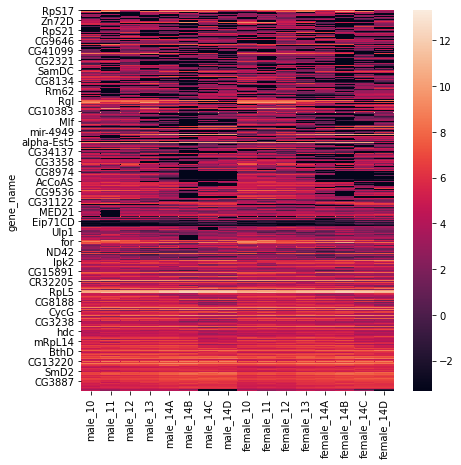

In [75]:
plt.figure(figsize = (7,7))
ax = sns.heatmap(FPKM_filter_reindex)

## plot a heatmap of the gene expression data.

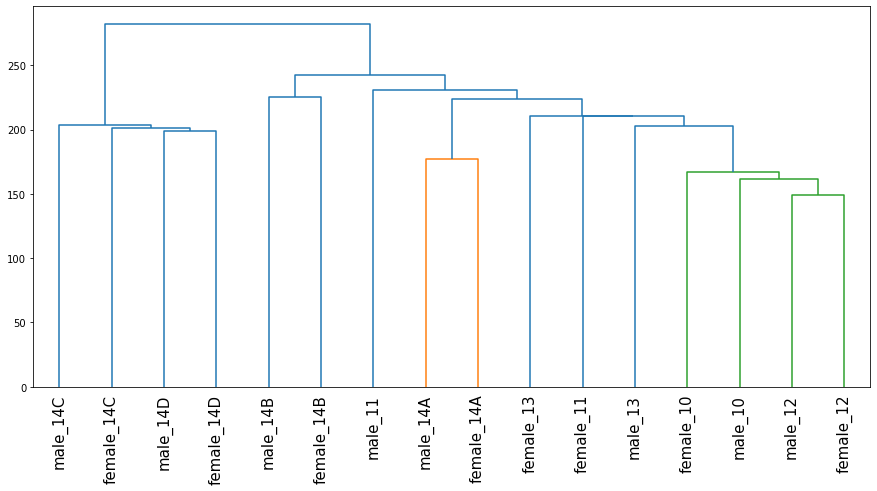

In [76]:
plt.figure(figsize=(15, 7
                   ))
dn = dendrogram(Z, 
                labels = FPKM_filter.columns[2:-1],
                leaf_rotation=90,
                leaf_font_size=15,
                )
plt.show()

# Differential expression

## Use ordinary least squares regression to test for genes that are differentially expressed across stages. Use the stage number as a numeric independent variable (10, 11, 12, 13, 14), and ignore the letter suffixes on day 14 (i.e., treat 14A, 14B, 14C, and 14D as equivalent).

In [151]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,18.002343
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,7.408367
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,16.617589
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,51.024830
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,71.833485
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,211.546905
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,1913.698243
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,0.026254


In [152]:
FPKM_filter_stage = FPKM_filter.iloc[:, 2:-1]
FPKM_filter_stage.rename(columns = {"male_10": 10, "male_11": 11, "male_12": 12, "male_13": 13, 
                            "male_14A": 14, "male_14B": 14, "male_14C": 14, "male_14D": 14, "female_10": 10, "female_11": 11, "female_12": 12, "female_13": 13, 
                            "female_14A": 14, "female_14B": 14, "female_14C": 14, "female_14D": 14}, inplace = True )
FPKM_filter_stage

,10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [153]:
pvalues_all = []
coef_all = []
X = np.array(FPKM_filter_stage.columns, int).reshape(-1,1)
X = sa.add_constant(X)
for i in range(0, 8613):
    Y = np.array(FPKM_filter_stage.iloc[i])
    model = sa.OLS(Y, X).fit()
    pvalues_all.append(model.pvalues[0])
    coef_all.append(model.params[1])

In [154]:
len(pvalues_all)

8613

In [82]:
# pvalues_A = []
# for i in range(0, len(pvalues_all)):
#     pvalues_A.append(pvalues_all[i][1])

## Generate a QQ plot from the p-values.

In [83]:
# fig = sm.qqplot(np.array(pvalues_A), line='45', markersize = 0.5, color = "purple")
# plt.title("QQ plot for all pvalues from male and female")
# py.show()

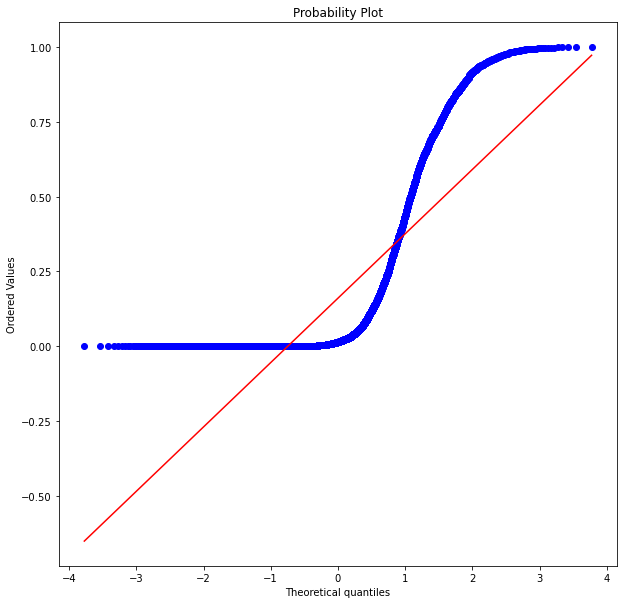

In [155]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize = (10, 10))
stats.probplot(pvalues_all, dist = "norm", plot = ax)
plt.show()

## Report the list of genes that exhibit differential expression by stage at a 10% false discovery rate.



In [156]:
import statsmodels.stats as ss
corrected_all = list(ss.multitest.fdrcorrection(pvalues_all, alpha = 0.1))

In [91]:
#1. Figure out which pvalues we will be confident to reject the null hypothesis
#2. Subset the data frame to include only these significant ones.

In [172]:
FPKM_filter["C"] = corrected_all[0]
FPKM_filter["Corrected_P"] = corrected_all[1]
FPKM_filter["slope"] = coef_all

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [173]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median,C,Corrected_P,slope
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,...,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,18.002343,True,0.004612,0.026464
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,...,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,7.408367,False,0.255619,0.880440
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,...,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,16.617589,False,0.778055,0.388746
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,...,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,51.024830,False,0.593891,0.542177
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,...,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,74.296821,False,0.170966,0.201195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,...,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,71.833485,False,0.401961,0.820108
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,...,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,211.546905,False,0.422969,0.942403
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,...,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,1913.698243,False,0.232497,0.231565
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,...,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,0.026254,False,0.982161,-0.212609


In [175]:
gene_all = list(FPKM_filter[FPKM_filter["C"] == True]["gene_name"])

In [101]:
# FPKM_filter["Corrected_P"] = corrected_all
# FPKM_filter["slope"] = coef_all
# gene_list_all = FPKM_filter[FPKM_filter["Corrected_P"] < 0.05][["gene_name", "Corrected_P", "slope"]]
# gene_list_all_VP = FPKM_filter[["gene_name", "Corrected_P", "slope"]]

In [30]:
# plt.scatter(gene_list_all["gene_name"], gene_list_all["Corrected_P"], s=0.3)
# plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
# plt.show()

## Repeat the analysis while controlling for sex.

In [162]:
FPKM_filter_reindex_trasnpose = FPKM_filter_reindex.T
FPKM_filter_reindex_trasnpose
FPKM_filter_reindex_trasnpose["sex"] = ["M","M","M","M","M","M","M","M","F","F","F","F","F","F","F", "F"]
FPKM_filter_reindex_trasnpose["stage"] = [10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14]
FPKM_filter_reindex_trasnpose

gene_name,RpS17,RpS29,CG30382,RpS29,CG10417,CG18547,CG11208,CG3224,dgo,RpL27,...,CR30055,CG2938,yrt,tra2,Crag,CG2938,qm,Mppe,sex,stage
male_10,10.362427,5.834810,6.116518,10.616585,5.608112,-3.321928,4.378683,5.779162,-3.321928,8.767086,...,4.743683,3.594072,4.106772,3.697081,3.928964,3.654464,3.354926,4.722249,M,10
male_11,9.674967,4.495864,-3.321928,9.584416,-3.321928,3.909693,-3.321928,-3.321928,3.376702,-3.321928,...,3.420027,3.535011,3.957843,4.215109,4.456723,3.595382,3.734655,2.767344,M,11
male_12,10.730739,5.910958,6.332019,10.723743,-3.321928,4.599172,-3.321928,6.096289,-3.321928,10.696994,...,4.523377,2.657493,3.340211,3.753138,2.938631,5.371957,3.554976,4.618271,M,12
male_13,10.533361,6.306998,-3.321928,10.903922,6.886073,-3.321928,-3.321928,5.911084,4.347014,10.459904,...,4.584666,4.016280,4.468546,2.796918,2.515062,4.142772,4.292943,4.319669,M,13
male_14A,10.186101,-3.321928,7.029427,11.426619,-3.321928,-3.321928,-3.321928,6.603512,4.604090,10.829233,...,4.030091,4.785573,3.068822,3.022511,3.133134,4.846243,3.798314,4.215258,M,14
male_14B,9.915343,-3.321928,7.333518,11.456581,4.775450,5.233040,5.323406,6.918546,-3.321928,11.661625,...,3.525707,4.129548,1.057866,0.565386,2.203526,4.190093,4.012782,4.431134,M,14
male_14C,11.627885,-3.321928,-3.321928,11.891232,-3.321928,5.190047,6.431035,5.731540,4.041921,11.132037,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,M,14
male_14D,6.513012,6.690422,-3.321928,11.521811,7.226825,-3.321928,5.671732,-3.321928,2.936486,10.725158,...,-0.113258,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,M,14
female_10,-3.321928,-3.321928,6.008203,10.592872,4.165947,-3.321928,5.161730,5.851321,-3.321928,10.412907,...,4.398834,2.659333,3.573073,3.743997,4.032783,2.719274,4.214183,4.705031,F,10
female_11,9.911055,5.681848,6.486714,9.876014,5.750684,-3.321928,-3.321928,-3.321928,-3.321928,10.917299,...,3.994919,4.183621,4.438132,4.404787,3.644903,4.244179,4.118265,2.718641,F,11


In [163]:
pvalues_with_sex = []
coef_with_sex = []
X = FPKM_filter_reindex_trasnpose['stage']
# X = np.array(FPKM_filter_stage.columns, int).reshape(-1,1)
# X = sm.add_constant(X)
for idx, col in FPKM_filter_reindex_trasnpose.iteritems():
    if idx == 'stage' or idx == 'sex':
        continue
    model = sm.ols(formula='col ~ X + sex', data= FPKM_filter_reindex_trasnpose)
    results = model.fit()
    pvalues_with_sex.append(results.pvalues[0])
    coef_with_sex.append(results.params[1])

In [164]:
corrected_with_sex = list(ss.multitest.fdrcorrection(pvalues_with_sex, alpha = 0.1))

In [174]:
FPKM_filter_reindex["C"] = corrected_with_sex[0]
FPKM_filter_reindex["slope"] = coef_with_sex
FPKM_filter_reindex["Corrected_P"] = corrected_with_sex[1]
FPKM_filter_reindex[FPKM_filter_reindex["C"] == True]
gene_with_sex = list(FPKM_filter_reindex[FPKM_filter_reindex["C"] == True].index)

## Compare the lists–what is the percentage overlap with and without sex as a covariate?

In [179]:
len(set(gene_all) & set(gene_with_sex))/len(gene_with_sex)

0.746384872080089

In [180]:
textfile = open("gene_all.txt", "w")
for element in gene_all:
    textfile.write(element + "\n")
textfile.close()

In [181]:
textfile = open("gene_with_sex.txt", "w")
for element in gene_with_sex:
    textfile.write(element + "\n")
textfile.close()

# Generate a volcano plot of the differential expression, with sex as a covariate, results ( -log10(p-value) on the y-axis, beta on the x axis). Color the significant points in a different color.

In [192]:
FPKM_filter_reindex[FPKM_filter_reindex["C"] == True]

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,C,Corrected_P,slope
gene_name,,,,,,,,,,,,,,,,,,,
bnb,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,5.034882,10.031982,10.403539,-3.321928,-3.321928,-3.321928,6.018043,7.615462,9.763077,10.795575,10.291028,True,0.004454,-3.207080
Nap1,8.346045,7.184010,5.995572,-3.321928,5.512063,-3.321928,7.326074,-3.321928,8.206623,7.720522,7.749189,6.618945,6.776710,-3.321928,5.482487,6.186725,True,0.026985,-2.627662
Z600,1.247433,2.339887,-1.390200,-0.357746,3.479212,6.210808,9.134826,8.377446,-3.321928,1.895129,-1.603661,1.818112,4.780065,4.931695,-0.354304,-0.976092,True,0.053388,2.734081
kuk,-3.321928,-3.321928,1.224288,-3.321928,5.144117,5.341537,6.694498,6.658822,-3.321928,-3.321928,2.677352,6.126469,5.519605,5.201133,-3.321928,4.243721,True,0.009574,0.161873
EloA,6.321942,6.019054,6.362083,6.512052,-3.321928,1.826816,5.260837,4.097755,5.935206,6.063249,6.564763,6.494861,5.953643,-3.321928,-3.321928,-3.321928,True,0.021474,1.504084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CR30055,4.743683,3.420027,4.523377,4.584666,4.030091,3.525707,-3.321928,-0.113258,4.398834,3.994919,4.399439,4.477864,4.170384,3.614663,1.248180,-3.321928,True,0.048729,-0.198749
yrt,4.106772,3.957843,3.340211,4.468546,3.068822,1.057866,-3.321928,-3.321928,3.573073,4.438132,4.584936,4.467992,4.054415,2.793981,1.446959,-3.321928,True,0.028243,-1.085170
tra2,3.697081,4.215109,3.753138,2.796918,3.022511,0.565386,-3.321928,-3.321928,3.743997,4.404787,4.144922,2.975323,2.514033,2.556431,1.510554,-3.321928,True,0.011560,-0.890229


In [183]:
sex_cov = FPKM_filter_reindex[FPKM_filter_reindex["C"] == True][["Corrected_P", "slope"]]

In [193]:
sex_cov

,Corrected_P,slope
gene_name,,
bnb,0.004454,-3.207080
Nap1,0.026985,-2.627662
Z600,0.053388,2.734081
kuk,0.009574,0.161873
EloA,0.021474,1.504084
...,...,...
CR30055,0.048729,-0.198749
yrt,0.028243,-1.085170
tra2,0.011560,-0.890229


In [185]:
from bioinfokit import analys, visuz

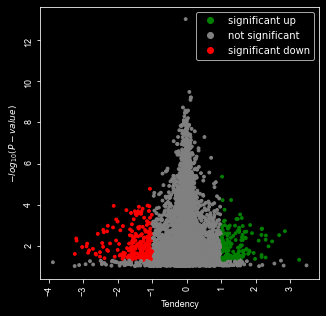

In [186]:
visuz.gene_exp.volcano(df=sex_cov, lfc='slope', pv='Corrected_P', show = True, theme = "dark", 
                       plotlegend=True, legendpos='upper right', axxlabel = "Tendency")

Male

In [133]:
# male_FPKM = FPKM_filter.iloc[:, 2:10]
# female_FPKM = FPKM_filter.iloc[:, 10:-2]

In [134]:
# female_FPKM.rename(columns={"female_10": 10, "female_11": 11, "female_12": 12, "female_13": 13, 
#                             "female_14A": 14, "female_14B": 14, "female_14C": 14, "female_14D": 14}, inplace=True)

In [135]:
# male_FPKM.rename(columns={"male_10": 10, "male_11": 11, "male_12": 12, "male_13": 13, 
#                             "male_14A": 14, "male_14B": 14, "male_14C": 14, "male_14D": 14}, inplace=True)

In [136]:
# pvalues_male = []
# coef_M = []
# X = np.array(male_FPKM.columns, int).reshape(-1,1)
# X = sm.add_constant(X)
# for i in range(0, 8289):
#     Y = np.array(male_FPKM.iloc[i])
#     model = sm.OLS(Y, X).fit()
#     pvalues_male.append(model.pvalues)
#     coef_M.append(model.params[1])

In [137]:
# pvalues_M = []
# for i in range(0, len(pvalues_male)):
#     pvalues_M.append(pvalues_male[i][1])
# corrected_M = list(ss.multitest.fdrcorrection(np.array(pvalues_M))[1])

In [138]:
# male_FPKM["corrected P"] = corrected_M
# male_FPKM["slope"] = coef_M

In [139]:
# male_FPKM

In [140]:
# gene_M = FPKM_filter[male_FPKM["corrected P"] < 0.05][["gene_name"]]
# gene_M["Corrected_P"] = male_FPKM[male_FPKM["corrected P"] < 0.05]["corrected P"]
# gene_M["slope"] = male_FPKM[male_FPKM["corrected P"] < 0.05]["slope"]
# # gene_M["P_logTrans"] = -np.log10(male_FPKM[male_FPKM["corrected P"] < 0.05]["corrected P"])
# gene_M_VP = male_FPKM[["corrected P", "slope"]]
# gene_M_VP["gene"] = FPKM_filter["gene_name"]

In [141]:
# gene_M_VP

Female

In [142]:
# pvalues_female = []
# coef_F = []
# X = np.array(female_FPKM.columns, int).reshape(-1,1)
# X = sm.add_constant(X)
# for i in range(0, 8289):
#     Y = np.array(female_FPKM.iloc[i])
#     model = sm.OLS(Y, X).fit()
#     pvalues_female.append(model.pvalues)
#     coef_F.append(model.params[1])
# pvalues_F = []
# for i in range(0, len(pvalues_female)):
#     pvalues_F.append(pvalues_female[i][0])
# corrected_F = list(ss.multitest.fdrcorrection(np.array(pvalues_F))[1])
# female_FPKM["corrected P"] = corrected_F
# female_FPKM["slope"] = coef_F
# gene_F = FPKM_filter[female_FPKM["corrected P"] < 0.05][["gene_name"]]
# gene_F["Corrected_P"] = female_FPKM[female_FPKM["corrected P"] < 0.05]["corrected P"]
# gene_F["slope"] = female_FPKM[female_FPKM["corrected P"] < 0.05]["slope"]
# gene_F_VP = female_FPKM[["slope", corrected" P"]]

In [143]:
# gene_F
# gene_F_VP

In [189]:
# from bioinfokit import analys, visuz

In [190]:
# visuz.gene_exp.volcano(df=gene_list_all_VP, lfc='slope', pv='Corrected_P', show = True, theme = "dark", 
#                        plotlegend=True, legendpos='upper right', axxlabel = "Tendency")

In [188]:
# visuz.gene_exp.volcano(df=gene_M_VP, lfc='slope', pv='corrected P', show = True, theme = "dark", plotlegend=True, legendpos='upper right', axxlabel = "Tendency")

In [191]:
# visuz.gene_exp.volcano(df=gene_F_VP, lfc='slope', pv='corrected P', show = True, theme = "dark", plotlegend=True, legendpos='upper right', axxlabel = "Tendency")